<a href="https://colab.research.google.com/github/sumeghana/Fake-news-detection/blob/main/DATASET1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset:

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks whether the news article is real or fake:
 1: Fake news
 0: real News


DATA PREPROCESSING



In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# loading the dataset to a pandas DataFrame
import pandas as pd
news_dataset=pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False)

Skipping line 6877: unexpected end of data


In [ ]:
news_dataset.shape

(6875, 5)

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id          0
title     193
author    659
text       14
label       0
dtype: int64

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
print(news_dataset['content'])

0       Darrell Lucus House Dem Aide: We Didn’t Even S...
1       Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2       Consortiumnews.com Why the Truth Might Get You...
3       Jessica Purkiss 15 Civilians Killed In Single ...
4       Howard Portnoy Iranian woman jailed for fictio...
                              ...                        
6870    Cara Buckley Andrew Garfield, Spiritual Ghost ...
6871    Jameson Parker Harry Reid Vindicated: The FBI ...
6872    Jack Hadfield Over 12,000 Tweets Call For Trum...
6873    Ray McGovern Putin and Obama: the Trust Evapor...
6874    Mike McPhate California Today: On the Ground i...
Name: content, Length: 6875, dtype: object


In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

        id  ...                                            content
0        0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1        1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        2  ...  Consortiumnews.com Why the Truth Might Get You...
3        3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4        4  ...  Howard Portnoy Iranian woman jailed for fictio...
...    ...  ...                                                ...
6870  6870  ...  Cara Buckley Andrew Garfield, Spiritual Ghost ...
6871  6871  ...  Jameson Parker Harry Reid Vindicated: The FBI ...
6872  6872  ...  Jack Hadfield Over 12,000 Tweets Call For Trum...
6873  6873  ...  Ray McGovern Putin and Obama: the Trust Evapor...
6874  6874  ...  Mike McPhate California Today: On the Ground i...

[6875 rows x 5 columns]
0       1
1       0
2       1
3       1
4       1
       ..
6870    0
6871    1
6872    0
6873    1
6874    0
Name: label, Length: 6875, dtype: int64


Stemming:

Stemming is the process of reducing a word to its Root word

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0       darrel lucu hous dem aid even see comey letter...
1       daniel j flynn flynn hillari clinton big woman...
2                  consortiumnew com truth might get fire
3       jessica purkiss civilian kill singl us airstri...
4       howard portnoy iranian woman jail fiction unpu...
                              ...                        
6870    cara buckley andrew garfield spiritu ghost hol...
6871    jameson parker harri reid vindic fbi sit info ...
6872    jack hadfield tweet call trump assassin breitbart
6873                ray mcgovern putin obama trust evapor
6874    mike mcphate california today ground orovil ne...
Name: content, Length: 6875, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'jack hadfield tweet call trump assassin breitbart'
 'ray mcgovern putin obama trust evapor'
 'mike mcphate california today ground orovil new york time']


In [ ]:

print(Y)

[1 0 1 ... 0 1 0]


In [ ]:
Y.shape

(6875,)

DATA SUMMERIZATION


VECTORIZATION


In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
dct = dict()

In [ ]:
print(X)

  (0, 9577)	0.28300493715220104
  (0, 8211)	0.2572148146148013
  (0, 5460)	0.341420613781976
  (0, 5289)	0.2982110554312007
  (0, 4723)	0.25143648120340895
  (0, 4312)	0.22029791817933728
  (0, 3063)	0.23546444521988447
  (0, 2358)	0.26709230161809977
  (0, 2239)	0.341420613781976
  (0, 1844)	0.24773566132517855
  (0, 1550)	0.3956317020896285
  (0, 186)	0.2743212698775191
  (1, 10202)	0.28952333639839944
  (1, 4205)	0.18889592190940427
  (1, 3410)	0.7223448465320816
  (1, 2219)	0.2728093882480799
  (1, 1749)	0.18937471191077962
  (1, 1395)	0.37943881270227026
  (1, 1190)	0.15202385374005237
  (1, 946)	0.2852011264648358
  (2, 9532)	0.420672763561579
  (2, 5888)	0.49676783555995124
  (2, 3692)	0.3405998803785845
  (2, 3338)	0.3836416516236548
  (2, 1942)	0.4589493828684979
  :	:
  (6871, 3238)	0.2072360092886064
  (6871, 2629)	0.16936330536049626
  (6871, 2152)	0.34799678585389426
  (6872, 9577)	0.4216594170443985
  (6872, 9523)	0.17708199074231262
  (6872, 4693)	0.40311130078353136
  (

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 21 680]
 [  0 674]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       701
           1       0.50      1.00      0.66       674

    accuracy                           0.51      1375
   macro avg       0.75      0.51      0.36      1375
weighted avg       0.75      0.51      0.36      1375



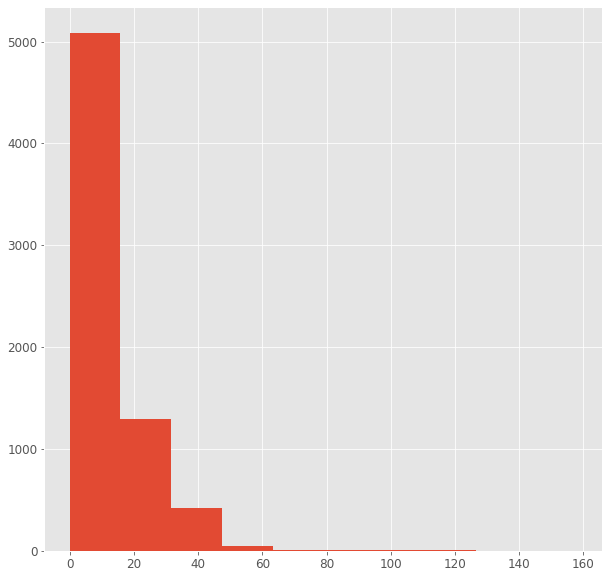

In [ ]:
news_dataset['author'].str.len().hist()

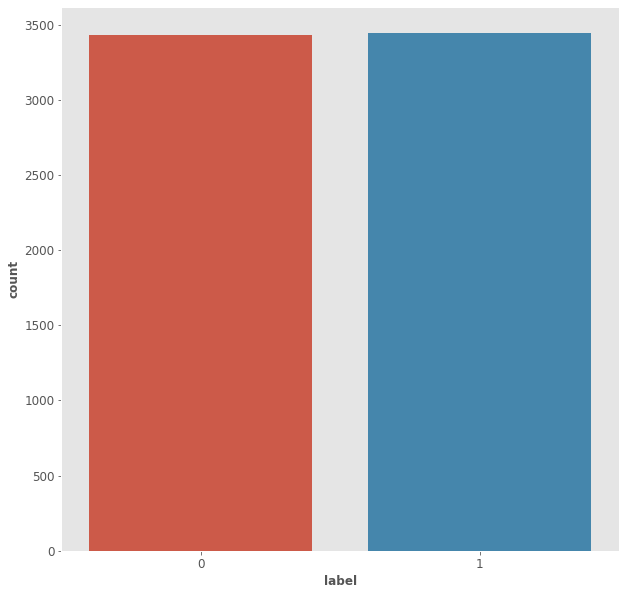

In [ ]:
import seaborn as sns
sns.countplot(x="label",data=news_dataset)
sns.set(rc={'figure.figsize':(2,2)})

In [ ]:
from sklearn.decomposition import PCA

# First: for every document we get its corresponding cluster
clusters = km.predict(X)

# We train the PCA on the dense version of the tf-idf.
pca = PCA(n_components=2)
two_dim = pca.fit_transform(X.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

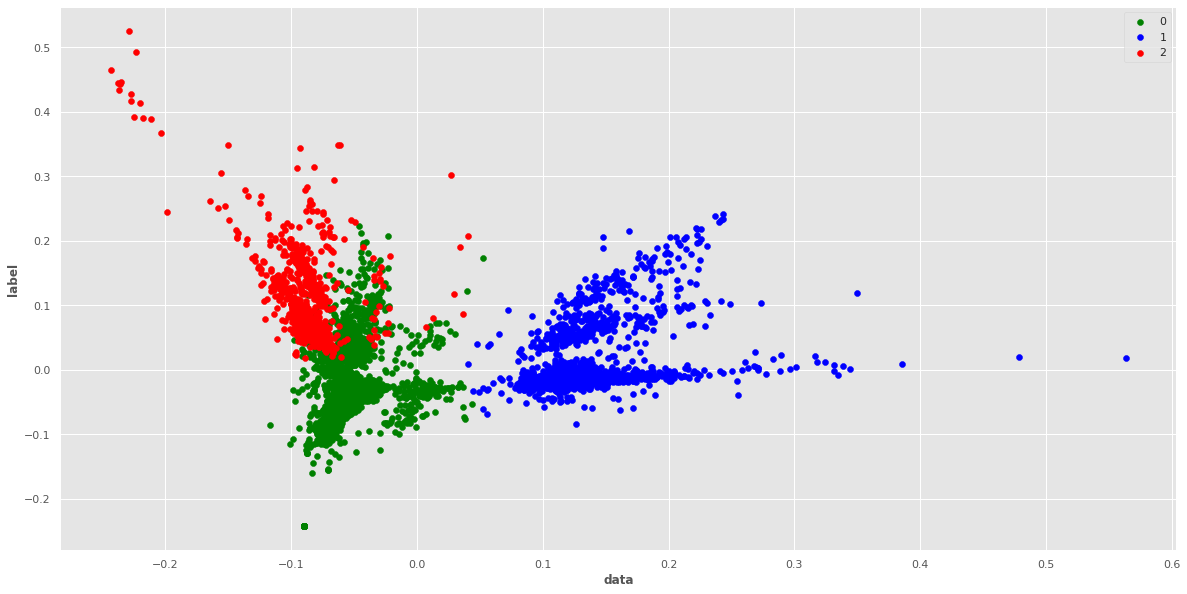

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("data")
plt.ylabel("label")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
#calling cross_val_score to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.
from sklearn.model_selection import train_test_split
#importing train_test_split from model_selection to split data into testing and training data

In [ ]:
dct = dict()

***SUPERVISED MODELS***

LOGISTIC REGRESSION


In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from datetime import date
import time

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 97.75%


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, labels=['Fake', 'Real'])

TypeError: ignored

In [ ]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['0']
The news is Fake


Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from datetime import date
import time

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([ ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 97.14%


Confusion matrix, without normalization


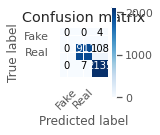

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from datetime import date
import time

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 98.75%


Confusion matrix, without normalization


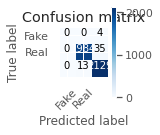

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
_new = X_test[9]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['0']
The news is Fake


([<matplotlib.axis.YTick at 0x7f98519cc9d0>,
 <a list of 10 Text major ticklabel objects>)

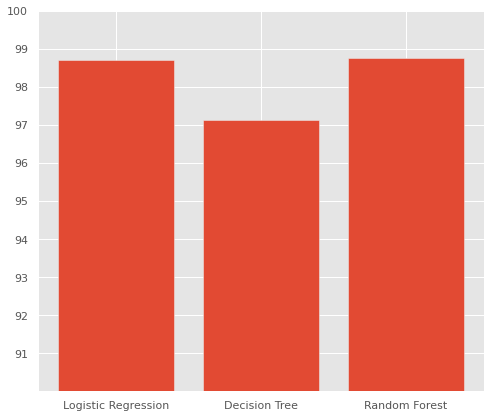

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

***UNSUPERVISED ALGORITHEMS***



KMEANS


In [ ]:
from sklearn.cluster import KMeans

NUMBER_OF_CLUSTERS = 3
km = KMeans(
    n_clusters=NUMBER_OF_CLUSTERS,
    init='k-means++',
    max_iter=500)
km.fit(X)

KMeans(max_iter=500, n_clusters=3)

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from datetime import date
import time

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

pipe = Pipeline([('tfidf', TfidfTransformer()),
                 ('model', KMeans(n_clusters=2, random_state=0).fit(X_train))])

model = pipe.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))
dct['KMeans'] = round(accuracy_score(Y_test, prediction)*100,2)

accuracy: 0.0%


***Principal Componenet Analysis***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
#from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (10, 10
                                 )
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)


import pandas as pd

In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")



In [ ]:
data_matrix = embed(news_dataset.title.tolist())

In [ ]:
train_data = news_dataset.loc[0:int(len(news_dataset)*0.8)]
test_data = news_dataset.loc[int(len(news_dataset)*0.8):len(news_dataset)]

In [ ]:
pca = PCA(n_components=3)
pca_data = pca.fit(data_matrix[0:len(train_data)])
pca_train = pca.transform(data_matrix[0:len(train_data)])

In [ ]:
pca_3_data = pd.DataFrame({'First Component':pca_train[:,0],'Second Component':pca_train[:,1],'Third Component':pca_train[:,2],'Target': train_data.label})

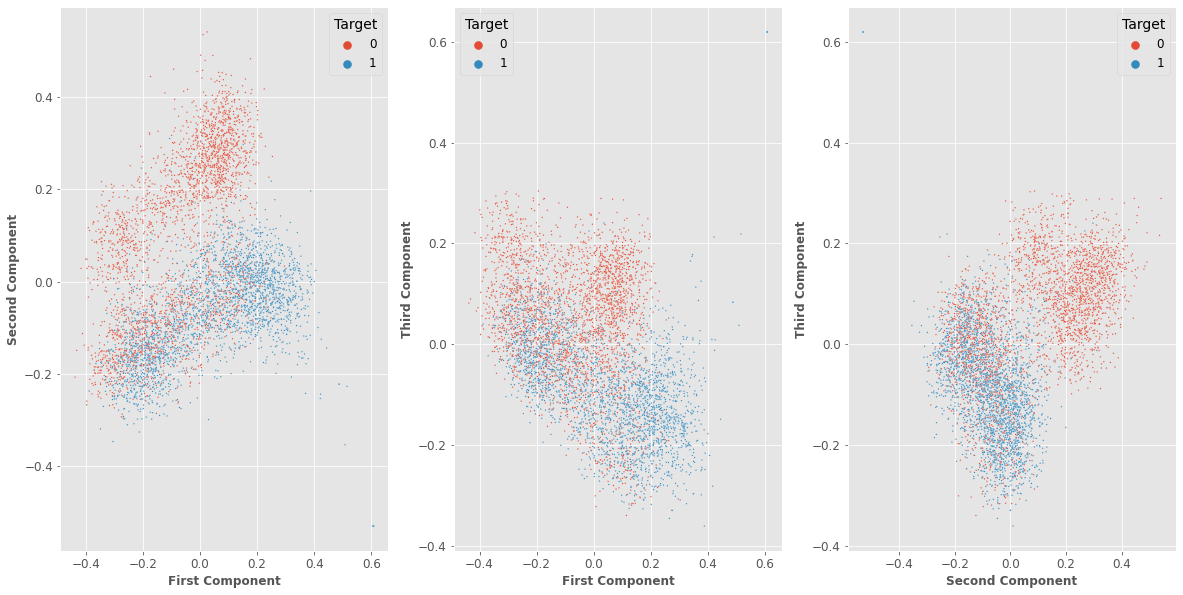

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x='First Component', y = 'Second Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)
plt.subplot(1,3,2)
sns.scatterplot(x='First Component', y = 'Third Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)
plt.subplot(1,3,3)
sns.scatterplot(x='Second Component', y = 'Third Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_true = le.fit_transform(test_data.label)

In [ ]:
pca_3_data

,First Component,Second Component,Third Component,Target
0,-0.164916,-0.228871,-0.013856,1
1,-0.332094,-0.165028,0.037562,0
2,0.169735,-0.107569,-0.079696,1
3,0.201014,0.019376,-0.317611,1
4,0.092992,0.062691,-0.107477,1
...,...,...,...,...
5496,-0.167235,-0.143263,-0.018602,0
5497,-0.333914,0.088771,0.214450,0
5498,-0.134771,-0.156986,-0.155212,1
5499,-0.163712,-0.111041,-0.030506,0


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
print(classification_report(Y_pred,y_true))

              precision    recall  f1-score   support

           0       0.02      0.62      0.04        21
           1       0.99      0.50      0.66      1354

    accuracy                           0.50      1375
   macro avg       0.50      0.56      0.35      1375
weighted avg       0.97      0.50      0.65      1375

